# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create endpoint URL with each city
city_url = query_url + city

city_weather = requests.get(query_url + city).json()

city_weather

{'coord': {'lon': 5.7985, 'lat': 15.8969},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 32.7,
  'feels_like': 30.48,
  'temp_min': 32.7,
  'temp_max': 32.7,
  'pressure': 1012,
  'humidity': 17,
  'sea_level': 1012,
  'grnd_level': 966},
 'visibility': 10000,
 'wind': {'speed': 4.24, 'deg': 108, 'gust': 7.08},
 'clouds': {'all': 100},
 'dt': 1697580690,
 'sys': {'country': 'NE', 'sunrise': 1697520544, 'sunset': 1697562905},
 'timezone': 3600,
 'id': 2438974,
 'name': 'Tchin Tabaradèn',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | olyokminsk
Processing Record 3 of Set 1 | sumusta as sultani
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | bath
Processing Record 7 of Set 1 | yangor
City not found. Skipping...
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | kirundo
Processing Record 12 of Set 1 | san antonio de pale
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | vorkuta
Processing Record 16 of Set 1 | novovarshavka
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | toga village
City not found. Skipping...
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,28.73,76,20,5.14,US,1697580697
1,olyokminsk,60.3736,120.4264,1.11,67,96,3.58,RU,1697580698
2,sumusta as sultani,28.9167,30.8500,22.50,58,5,4.02,EG,1697580698
3,alofi,-19.0595,-169.9187,25.94,53,40,9.77,NU,1697580699
4,adamstown,-25.0660,-130.1015,22.40,85,100,4.47,PN,1697580699


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,28.73,76,20,5.14,US,1697580697
1,olyokminsk,60.3736,120.4264,1.11,67,96,3.58,RU,1697580698
2,sumusta as sultani,28.9167,30.8500,22.50,58,5,4.02,EG,1697580698
3,alofi,-19.0595,-169.9187,25.94,53,40,9.77,NU,1697580699
4,adamstown,-25.0660,-130.1015,22.40,85,100,4.47,PN,1697580699


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

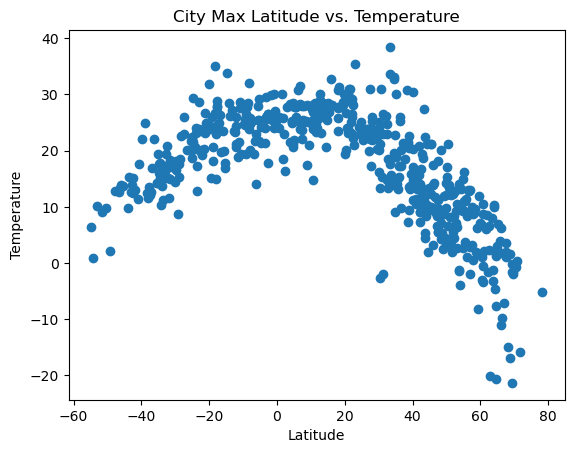

In [9]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

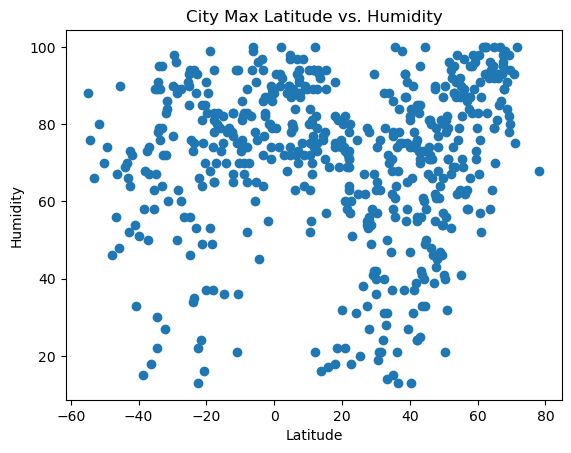

In [26]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Max Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

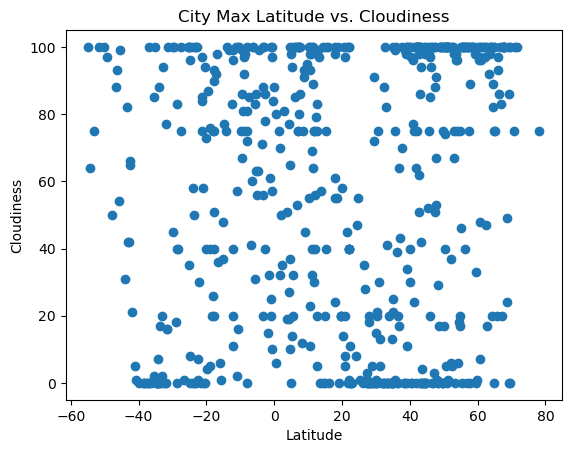

In [27]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Max Latitude vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

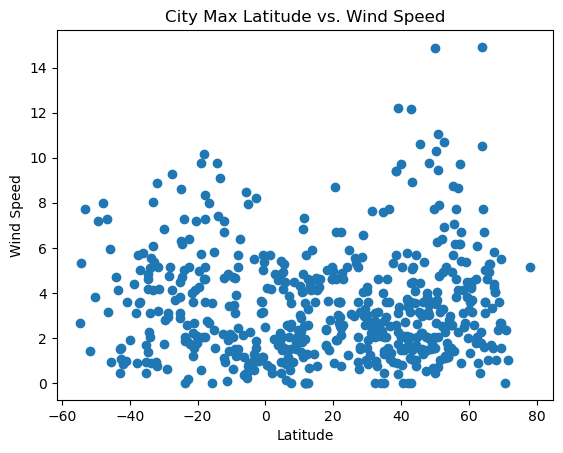

In [12]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Max Latitude vs. Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,28.73,76,20,5.14,US,1697580697
1,olyokminsk,60.3736,120.4264,1.11,67,96,3.58,RU,1697580698
2,sumusta as sultani,28.9167,30.8500,22.50,58,5,4.02,EG,1697580698
5,bath,51.3779,-2.3591,12.09,79,100,7.90,GB,1697580454
8,thompson,55.7435,-97.8558,11.31,69,100,1.42,CA,1697580701


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,alofi,-19.0595,-169.9187,25.94,53,40,9.77,NU,1697580699
4,adamstown,-25.0660,-130.1015,22.40,85,100,4.47,PN,1697580699
6,grytviken,-54.2811,-36.5092,0.98,76,64,5.33,GS,1697580506
7,atafu village,-8.5421,-172.5159,28.38,74,98,3.91,TK,1697580701
9,kirundo,-2.5833,30.1667,17.79,82,78,0.96,BI,1697580702


###  Temperature vs. Latitude Linear Regression Plot

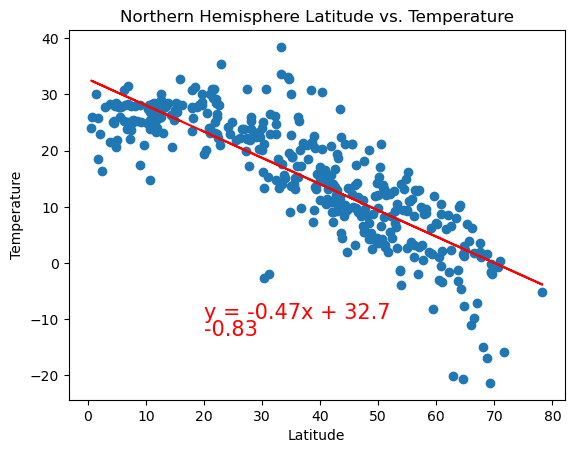

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere Latitude vs. Temperature")
plt.annotate(round(rvalue,2),(20,-13),fontsize=15,color="red")
plt.show()

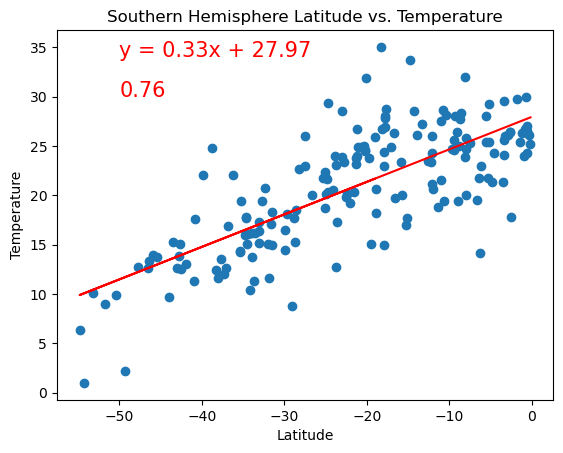

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,34),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere Latitude vs. Temperature")
plt.annotate(round(rvalue,2),(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

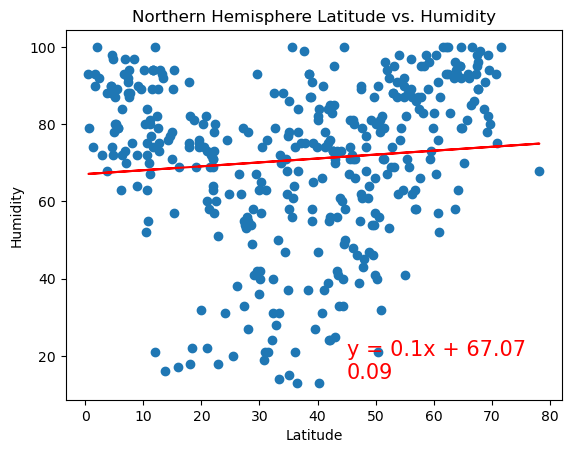

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.annotate(round(rvalue,2),(45,14),fontsize=15,color="red")
plt.show()

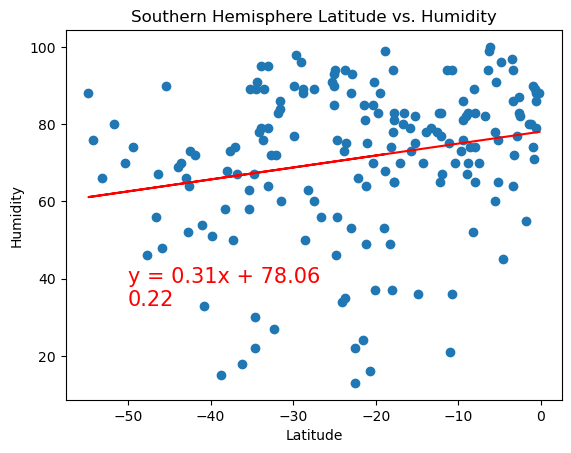

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,39),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.annotate(round(rvalue,2),(-50,33),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

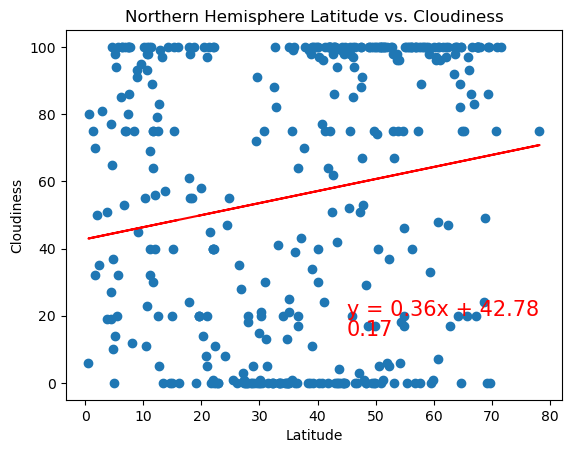

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.annotate(round(rvalue,2),(45,14),fontsize=15,color="red")
plt.show()

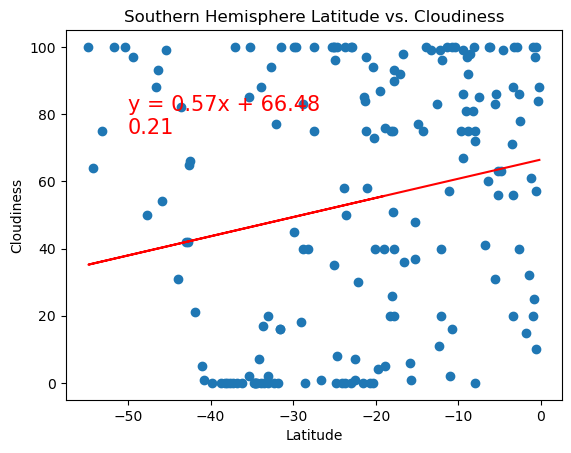

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,81),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.annotate(round(rvalue,2),(-50,74),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

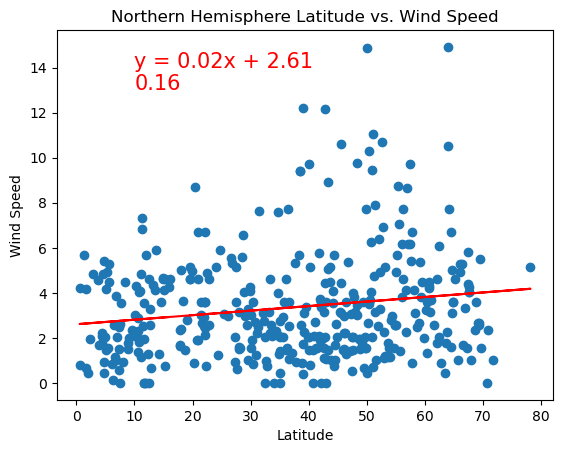

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.annotate(round(rvalue,2),(10,13),fontsize=15,color="red")
plt.show()

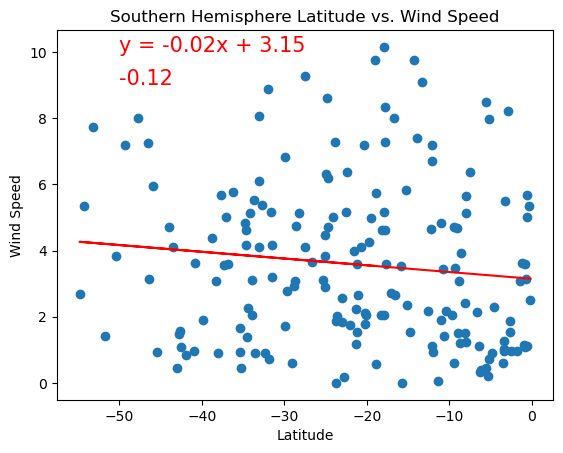

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.annotate(round(rvalue,2),(-50,9),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

For Latitude vs. Temperature both the Northern and Southern Hemispheres are strongly correlated at over .75 with the Northern Hemisphere being inversely correlated and the Southern Hemisphere being correlated and increasing in temperature as Latitude increases. For Humidity in the Northern Hemisphere, there is a lot more vaiability with only a rvalue of .09 and a slope of .1 showing a weak correlation. Humidity in the Southern Hemisphere is slightly more correlated with an rvalue of .22 and a stronger slope. Cloudiness is very widely dispersed for both the Northern and Southern Hemispheres and not very highly correlated with rvalues of .17 and .21 respectively. Wind speed is even less correlated for both hemispheres with the Northern Hemisphere having an rvalue of .16 and the Southern Hemisphere at .12. Based on this data, Temperature is strongly correlated to Latitude however all other weather phenomenon analyzed are weakly correlated.